In [113]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="colorblind")

In [114]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [115]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 16))
results_m_intel = np.zeros((len(seeds), 2750))
results_m_lintel = np.zeros((len(seeds), 2750))
results_s_intel = np.zeros((len(seeds), 2750))
results_s_lintel = np.zeros((len(seeds), 2750))
results_t_intel = np.zeros((len(seeds),))
results_t_lintel = np.zeros((len(seeds),))
results_pll_intel = np.zeros((len(seeds),))
results_pll_lintel = np.zeros((len(seeds),))
results_nmse_intel = np.zeros((len(seeds),))
results_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_3_seed_{seed}_geom_True_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_3_seed_{seed}_geom_True_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(f"results/experiment_3_seed_{seed}_geom_True_intel_results.npz")
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_m_lintel[seed, :] = m_lintel
    results_s_lintel[seed, :] = s_lintel
    results_m_intel[seed, :] = m_intel
    results_s_intel[seed, :] = s_intel
    results_t_lintel[seed] = t_lintel
    results_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [116]:
np.mean(results_pll_intel), np.std(results_pll_intel), np.mean(
    results_pll_lintel
), np.std(results_pll_lintel)

(-0.3493923910785553,
 0.018868568568430288,
 -0.3358776811687972,
 0.01597665937230485)

In [117]:
stats.wilcoxon(results_pll_intel, results_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [118]:
np.mean(results_nmse_intel), np.std(results_nmse_intel), np.mean(
    results_nmse_lintel
), np.std(results_nmse_lintel)

(0.08272552930382793,
 0.02380607926743856,
 0.08039884440810068,
 0.022709954074744385)

In [119]:
stats.wilcoxon(results_nmse_intel, results_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=55.0, pvalue=0.0009765625)

In [120]:
np.mean(results_t_intel), np.std(results_t_intel), np.mean(results_t_lintel), np.std(
    results_t_lintel
)

(32.341052174568176,
 0.5710435713274113,
 5.156460857391357,
 0.07518291734679824)

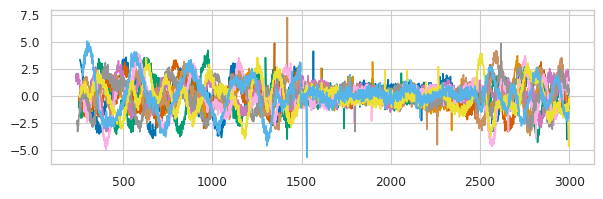

In [121]:
fig, ax1 = plt.subplots(figsize=(7, 2))
ax1.plot(data_train_t.T, data_train_y.T)
plt.savefig(
    "plots/experiment_3_functions.png", dpi=600, transparent=False, bbox_inches="tight"
)

In [122]:
data_train_t = np.zeros((len(seeds), 2750))
data_train_y = np.zeros((len(seeds), 2750))
data_outliers = np.zeros((len(seeds), 16))
results_aa_m_intel = np.zeros((len(seeds), 2750))
results_aa_m_lintel = np.zeros((len(seeds), 2750))
results_aa_s_intel = np.zeros((len(seeds), 2750))
results_aa_s_lintel = np.zeros((len(seeds), 2750))
results_aa_t_intel = np.zeros((len(seeds),))
results_aa_t_lintel = np.zeros((len(seeds),))
results_aa_pll_intel = np.zeros((len(seeds),))
results_aa_pll_lintel = np.zeros((len(seeds),))
results_aa_nmse_intel = np.zeros((len(seeds),))
results_aa_nmse_lintel = np.zeros(
    (len(seeds)),
)

for seed in seeds:
    data = np.load(f"results/experiment_3_seed_{seed}_geom_False_data.npz")
    train_t = data["train_t"].squeeze()
    pretrain_t = data["pretrain_t"].squeeze()
    train_y = data["train_y"]
    pretrain_y = data["pretrain_y"]
    true_outliers = data["true_outliers"]

    data_train_t[seed, :] = train_t
    data_train_y[seed, :] = train_y
    data_outliers[seed, :] = true_outliers

    res_lintel = np.load(
        f"results/experiment_3_seed_{seed}_geom_False_lintel_results.npz"
    )
    m_lintel = res_lintel["ms"]
    s_lintel = res_lintel["ss"]
    o_lintel = res_lintel["ots"]
    w_lintel = res_lintel["ws"]
    t_lintel = res_lintel["t_lintel"]

    res_intel = np.load(
        f"results/experiment_3_seed_{seed}_geom_False_intel_results.npz"
    )
    m_intel = res_intel["ms"]
    s_intel = res_intel["ss"]
    o_intel = res_intel["ots"]
    w_intel = res_intel["ws"]
    t_intel = res_intel["t_intel"]

    results_aa_m_lintel[seed, :] = m_lintel
    results_aa_s_lintel[seed, :] = s_lintel
    results_aa_m_intel[seed, :] = m_intel
    results_aa_s_intel[seed, :] = s_intel
    results_aa_t_lintel[seed] = t_lintel
    results_aa_t_intel[seed] = t_intel

    intel_pll = stats.norm.logpdf(train_y, m_intel, np.sqrt(s_intel))
    lintel_pll = stats.norm.logpdf(train_y, m_lintel, np.sqrt(s_lintel))
    results_aa_pll_intel[seed] = np.delete(intel_pll, true_outliers).mean()
    results_aa_pll_lintel[seed] = np.delete(lintel_pll, true_outliers).mean()

    intel_nmse = (train_y - m_intel) ** 2 / np.var(train_y)
    lintel_nmse = (train_y - m_lintel) ** 2 / np.var(train_y)
    results_aa_nmse_intel[seed] = np.delete(intel_nmse, true_outliers).mean()
    results_aa_nmse_lintel[seed] = np.delete(lintel_nmse, true_outliers).mean()

In [123]:
np.mean(results_aa_pll_intel), np.std(results_aa_pll_intel), np.mean(
    results_aa_pll_lintel
), np.std(results_aa_pll_lintel)

(-0.34762095086978684,
 0.01888357555382144,
 -0.3346008024822645,
 0.015890335710542682)

In [124]:
stats.wilcoxon(results_aa_pll_intel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [125]:
stats.wilcoxon(results_pll_lintel, results_aa_pll_lintel, alternative="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [126]:
np.mean(results_aa_nmse_intel), np.std(results_aa_nmse_intel), np.mean(
    results_aa_nmse_lintel
), np.std(results_aa_nmse_lintel)

(0.08264491286347855,
 0.02379057384008042,
 0.08034967431139896,
 0.022656949778206075)

In [127]:
stats.wilcoxon(results_aa_nmse_intel, results_aa_nmse_lintel, alternative="greater")

WilcoxonResult(statistic=55.0, pvalue=0.0009765625)

In [128]:
np.mean(results_aa_t_intel), np.std(results_aa_t_intel), np.mean(
    results_aa_t_lintel
), np.std(results_aa_t_lintel)

(31.983511400222778,
 0.40445118238404887,
 5.135866737365722,
 0.06906714262644295)

In [129]:
stats.wilcoxon(results_aa_t_lintel, results_t_lintel, alternative="two-sided")

WilcoxonResult(statistic=21.0, pvalue=0.556640625)